# Evaluate LM with financial phrasebank

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print(eKonf.__version__)

0.1.32+4.gfd15d82.dirty


## Prepare `financial_phrasebank` dataset

In [2]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group="dataset")
ds_cfg.name = "financial_phrasebank"
ds_cfg.path.cache.uri = "gd://15TUjIfQstCYXU82s0pcaxh2QcSWf1zyG:financial_phrasebank.zip"
ds_cfg.data_dir = ds_cfg.path.cached_path
ds = eKonf.instantiate(ds_cfg)
ds.INFO

{'name': 'financial_phrasebank',
 'domain': 'econ',
 'task': 'classification',
 'lang': 'en',
 'features': {'keys': {'id': 'id', 'text': 'text'},
  'data': {'id': 'int', 'labels': 'str', 'text': 'str'}},
 'splits': {'train': {'name': 'train',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-train.csv',
   'num_examples': 1445,
   'num_bytes': 176485,
   'num_bytes_median': 112.0,
   'num_bytes_max': 315,
   'num_bytes_min': 15,
   'human_bytes': '172.35 KiB'},
  'test': {'name': 'test',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-test.csv',
   'num_examples': 452,
   'num_bytes': 55518,
   'num_bytes_median': 110.0,
   'num_bytes_max': 296,
   'num_bytes_min': 11,
   'human_bytes': '54.22 KiB'},
  'dev': {'name': 'dev',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-dev.csv',
   'num_examples': 362,
   'num_bytes': 43404,
   'num_bytes_median': 109.0,
   'num_bytes_max': 296,
   'num_

## Instantiating a sentiment analyser with `financial_phrasebank` dataset

In [3]:
model_cfg = eKonf.compose(config_group="model/sentiment=lm")

cfg = eKonf.compose(config_group='pipeline')
cfg.data.dataset = ds_cfg
cfg._pipeline_ = ['predict']
cfg.predict.model = model_cfg
cfg.predict.output_dir = "./data/predict"
cfg.predict.output_file = f'{ds_cfg.name}.parquet'
cfg.num_workers = 100
data = eKonf.instantiate(cfg)

Predicting [text]: 100%|██████████| 91/91 [00:17<00:00,  5.27it/s]


In [4]:
# print(cfg.predict.output_dir)
print(cfg.predict.path.output.suffix)

None


Accuracy:  0.6423196104471005
Precison:  0.6335214835254505
Recall:  0.6423196104471005
F1 Score:  0.5979784064056457
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.38      0.36      0.37       303
     neutral       0.68      0.89      0.77      1386
    positive       0.65      0.19      0.29       570

    accuracy                           0.64      2259
   macro avg       0.57      0.48      0.48      2259
weighted avg       0.63      0.64      0.60      2259



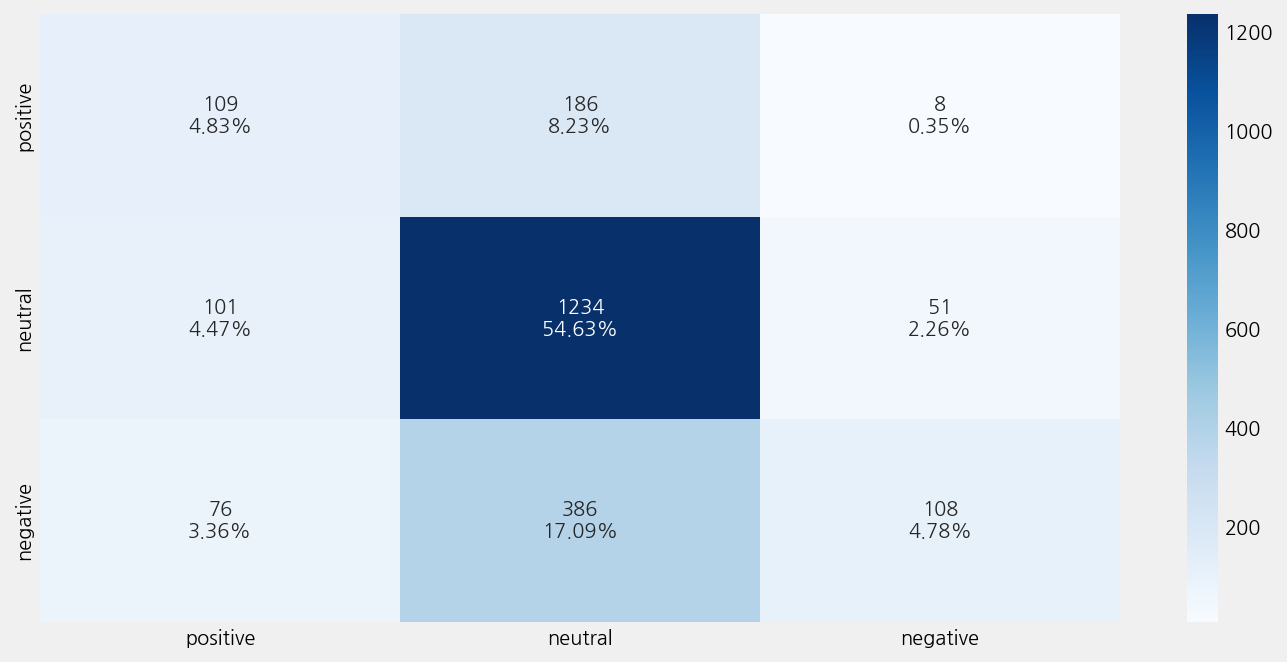

In [5]:
eval_cfg = eKonf.compose(config_group='model/eval=classification')
eval_cfg.to_eval.actual = 'labels'
eval_cfg.to_eval.predicted = 'polarity_label'
eval_cfg.to_eval.labels = ['positive','neutral','negative']
eval_cfg.data_dir = './data/predict'
eval_cfg.data_file = 'financial_phrasebank-*.parquet'
eval_cfg.output_dir = './data/eval'
# eval_cfg.method.average = None
# eKonf.print(eval_cfg)
eKonf.instantiate(eval_cfg)